In [1]:
import torch
import xarray as xr

import os

from dm_zoo.dff.PixelDiffusion import PixelDiffusionConditional

from WD.datasets import Conditional_Dataset

from WD.config import DSConfig

from WD.io import create_xr_output_variables

import yaml

import numpy as np

/home/wider/.conda/envs/TORCH311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config_file_path = "/data/compoundx/WeatherDiff/config_file/F01A8B.yml"
min_max_file_path = "/data/compoundx/WeatherDiff/model_input/F01A8B_output_min_max.nc"


# we need some pytorch data to test the function with, so load a sample dataset:
pt_file_path = "/data/compoundx/WeatherDiff/model_input/F01A8B_test.pt"
ds = Conditional_Dataset(pt_file_path=pt_file_path, config_file_path=config_file_path)

inputs, targets, dates = ds[:10]

In [3]:
res = create_xr_output_variables(data=targets, dates=dates, config_file_path=config_file_path, min_max_file_path=min_max_file_path)

In [4]:
res

<xarray.Dataset>
Dimensions:    (lat: 32, lon: 64, lead_time: 1, init_time: 10)
Coordinates:
  * lat        (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon        (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lead_time  (lead_time) int64 1
  * init_time  (init_time) datetime64[ns] 2017-01-01T12:00:00 ... 2017-01-03T...
Data variables:
    tp         (init_time, lead_time, lat, lon) float32 3.871e-09 ... 3.035e-05
    z_500      (init_time, lead_time, lat, lon) float32 5.095e+04 ... 4.947e+04

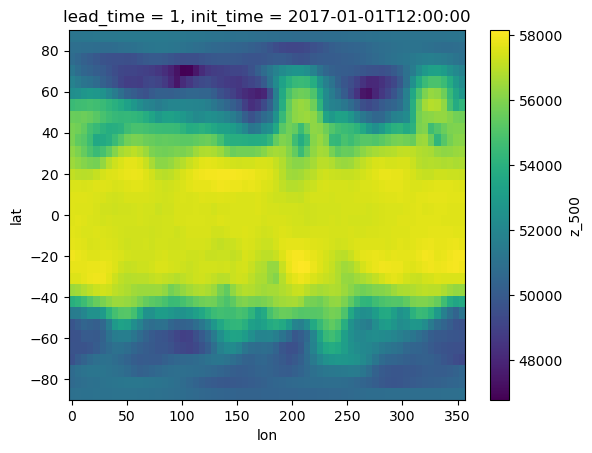

In [39]:
res.z_500[0].plot()